<a href="https://colab.research.google.com/github/MalVaroTor/MalVaroTor/blob/main/TCC_2_1_TESTE_MASSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTANDO O ARQUIVO E LENDO A TABELA ESPECIFICADA.**

---



---



In [1]:
import pandas as pd                 # IMPORTANDO BIBLIOTECA PARA DADOS

import matplotlib.pyplot as plt     # IMPORTANDO BIBLIOTECA PARA GRÁFICOS.

import numpy as np                  # IMPOTANDO BIBLIOTECA PARA TRABALHAR COM NÚMEROS.

import matplotlib.dates as mdates

db = pd.read_excel('/content/drive/MyDrive/TCC/db_dados/dados_2023dez.xlsx', sheet_name = 'dados_Fluxo_07dez')

display(db)

,Data/Hora,Data,Hora,M_Fluxo_[Nm3/h],V_Fluxo_[Nm3/h],P_Fluxo_[bar],T_Fluxo_[ºC],Pressao_Buffer_[bar]
0,2023-12-07 00:00:00.617,07/12/2023,00:00:01,-0.396094,NaN,216.284378,NaN,NaN
1,2023-12-07 00:00:01.617,07/12/2023,00:00:02,-0.397266,NaN,216.287506,NaN,NaN
2,2023-12-07 00:00:02.617,07/12/2023,00:00:03,-0.396875,NaN,216.285934,NaN,NaN
3,2023-12-07 00:00:03.617,07/12/2023,00:00:04,-0.397656,NaN,216.290634,NaN,NaN
4,2023-12-07 00:00:04.617,07/12/2023,00:00:05,-0.393359,NaN,216.289062,NaN,NaN
...,...,...,...,...,...,...,...,...
43507,2023-12-07 23:59:18.063,07/12/2023,23:59:18,-0.419141,NaN,218.662506,NaN,NaN
43508,2023-12-07 23:59:28.063,07/12/2023,23:59:28,-0.416797,NaN,NaN,25.675001,NaN
43509,2023-12-07 23:59:38.063,07/12/2023,23:59:38,-0.420312,NaN,NaN,NaN,NaN
43510,2023-12-07 23:59:48.063,07/12/2023,23:59:48,-0.416406,NaN,218.660934,NaN,NaN


# **LENDO OS TIPOS DE DADOS DAS COLUNAS DA TABELA.**

---



In [2]:
tipos_dados = db.dtypes

print(tipos_dados)

Data/Hora               datetime64[ns]
Data                            object
Hora                            object
M_Fluxo_[Nm3/h]                float64
V_Fluxo_[Nm3/h]                float64
P_Fluxo_[bar]                  float64
T_Fluxo_[ºC]                   float64
Pressao_Buffer_[bar]           float64
dtype: object


# **FILTRANDO A TABELA PARA A DATA 2023-12-07, NOS HORÁRIOS ESPECÍFICOS DE POWERSET DE ESTUDO DA TABELA dados_I_V_07dez.**

---



In [3]:
data_estudo = '2023-12-07'

# Filtrar os dados para a data específica
dados_data_especifica = db[db['Data/Hora'].dt.date == pd.to_datetime(data_estudo).date()]

# Especificar o intervalo de horário
hora_inicio = '10:32:24'
hora_fim = '11:09:43'

# Filtrar os dados dentro do intervalo de horário
dados_07dez = dados_data_especifica[(dados_data_especifica['Data/Hora'].dt.time >= pd.to_datetime(hora_inicio).time()) &
                                                (dados_data_especifica['Data/Hora'].dt.time <= pd.to_datetime(hora_fim).time())]

display(dados_07dez)


,Data/Hora,Data,Hora,M_Fluxo_[Nm3/h],V_Fluxo_[Nm3/h],P_Fluxo_[bar],T_Fluxo_[ºC],Pressao_Buffer_[bar]
37222,2023-12-07 10:32:24.162,07/12/2023,10:32:24,NaN,NaN,NaN,NaN,137.0
37223,2023-12-07 10:32:24.617,07/12/2023,10:32:25,-0.400781,NaN,214.542191,NaN,NaN
37224,2023-12-07 10:32:25.617,07/12/2023,10:32:26,-0.398438,NaN,214.540634,NaN,NaN
37225,2023-12-07 10:32:26.617,07/12/2023,10:32:27,-0.399609,NaN,NaN,NaN,NaN
37226,2023-12-07 10:32:27.617,07/12/2023,10:32:28,-0.398047,NaN,214.542191,NaN,NaN
...,...,...,...,...,...,...,...,...
38879,2023-12-07 11:09:18.063,07/12/2023,11:09:18,8.744141,NaN,218.284378,27.993750,NaN
38880,2023-12-07 11:09:28.063,07/12/2023,11:09:28,1.835547,NaN,217.462509,27.981251,139.0
38881,2023-12-07 11:09:27.923,07/12/2023,11:09:28,NaN,NaN,NaN,NaN,139.0
38882,2023-12-07 11:09:38.063,07/12/2023,11:09:38,6.389453,NaN,218.021881,27.987501,NaN


# **PLOTANDO UM GRÁFICO DO COMPORTAMENTO DE FLUXO DE MASSA POR TEMPO.**

---



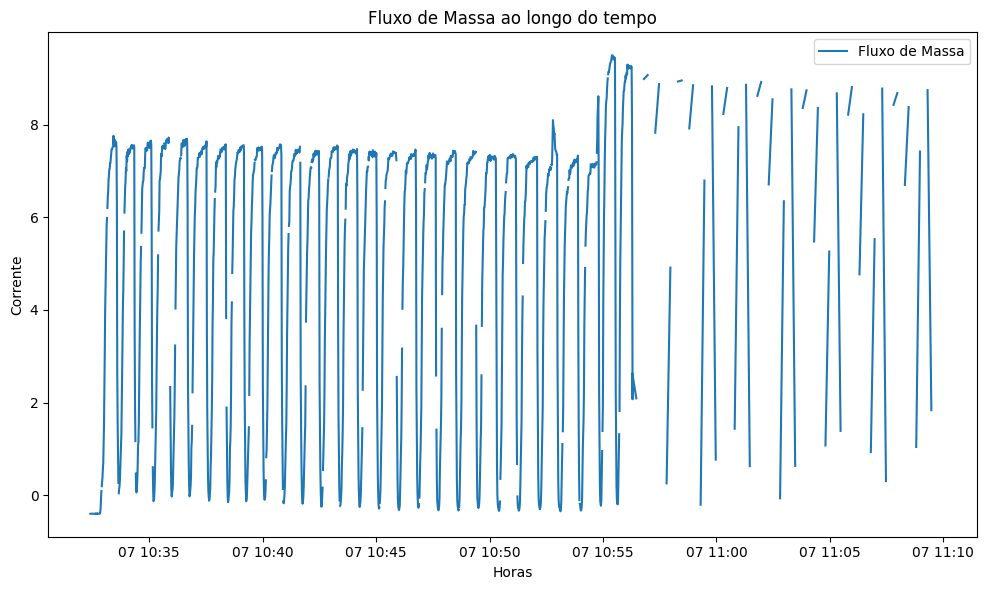

In [4]:
plt.figure(figsize=(10, 6))

# Plotar os dados
plt.plot(dados_07dez['Data/Hora'], dados_07dez['M_Fluxo_[Nm3/h]'], label='Fluxo de Massa')

# Adicionar rótulos aos eixos
plt.xlabel('Horas')
plt.ylabel('Corrente')
plt.title('Fluxo de Massa ao longo do tempo')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()

# **MELHORANDO O GRÁFICO ANTERIOR.**

---



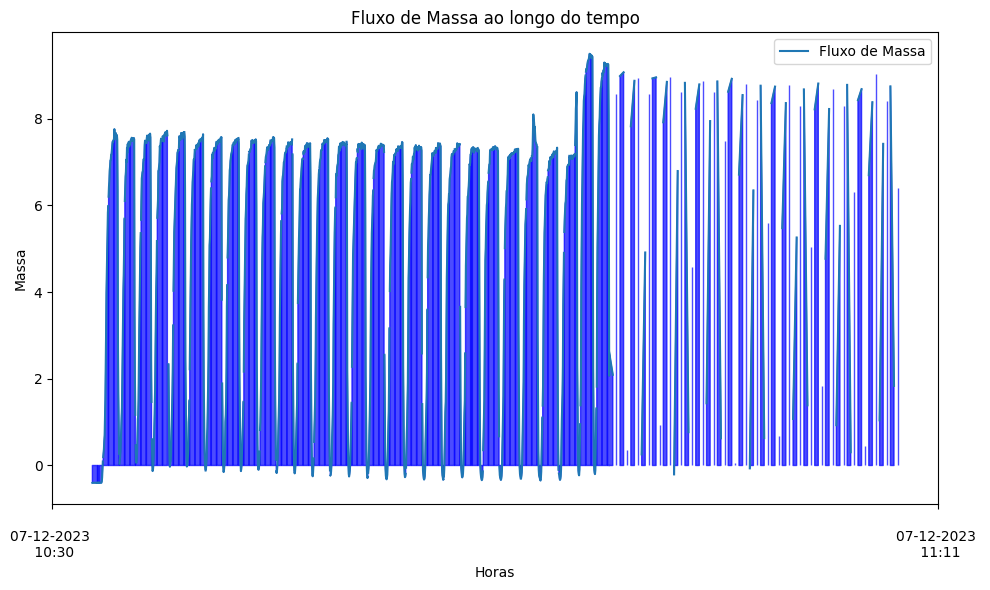

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Criar figura e eixos
fig, ax = plt.subplots(figsize=(10, 6))

# Plotar os dados
ax.plot(dados_07dez['Data/Hora'], dados_07dez['M_Fluxo_[Nm3/h]'], label='Fluxo de Massa')

# Preencher a área abaixo da curva
ax.fill_between(dados_07dez['Data/Hora'], dados_07dez['M_Fluxo_[Nm3/h]'], color='blue', alpha=0.7)

# Definir os rótulos dos eixos x
ax.xaxis.set_major_locator(mdates.DayLocator())  # Definir os principais locais dos dias
ax.xaxis.set_minor_locator(mdates.HourLocator(interval=6))  # Definir os locais menores das horas com intervalo de 6 horas
ax.xaxis.set_major_formatter(mdates.DateFormatter('\n%d-%m-%Y \n %H:%M'))  # Formato da data na parte superior


ax.set_xlabel('Horas')
ax.set_ylabel('Massa')
plt.title('Fluxo de Massa ao longo do tempo')

# Adicionar rótulos aos eixos
# ax.set_xlabel('Data e Hora')

# Adicionar legenda
ax.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()

# **CRIANDO A COLUNA DE HORAS EM FORMATO DECIMAL.**

---



In [6]:
dados_07dez['Hora_decimal'] = dados_07dez['Data/Hora'].dt.hour + dados_07dez['Data/Hora'].dt.minute / 60 + dados_07dez['Data/Hora'].dt.second / 3600

display(dados_07dez)

<ipython-input-6-a4929423a3bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_07dez['Hora_decimal'] = dados_07dez['Data/Hora'].dt.hour + dados_07dez['Data/Hora'].dt.minute / 60 + dados_07dez['Data/Hora'].dt.second / 3600


,Data/Hora,Data,Hora,M_Fluxo_[Nm3/h],V_Fluxo_[Nm3/h],P_Fluxo_[bar],T_Fluxo_[ºC],Pressao_Buffer_[bar],Hora_decimal
37222,2023-12-07 10:32:24.162,07/12/2023,10:32:24,NaN,NaN,NaN,NaN,137.0,10.540000
37223,2023-12-07 10:32:24.617,07/12/2023,10:32:25,-0.400781,NaN,214.542191,NaN,NaN,10.540000
37224,2023-12-07 10:32:25.617,07/12/2023,10:32:26,-0.398438,NaN,214.540634,NaN,NaN,10.540278
37225,2023-12-07 10:32:26.617,07/12/2023,10:32:27,-0.399609,NaN,NaN,NaN,NaN,10.540556
37226,2023-12-07 10:32:27.617,07/12/2023,10:32:28,-0.398047,NaN,214.542191,NaN,NaN,10.540833
...,...,...,...,...,...,...,...,...,...
38879,2023-12-07 11:09:18.063,07/12/2023,11:09:18,8.744141,NaN,218.284378,27.993750,NaN,11.155000
38880,2023-12-07 11:09:28.063,07/12/2023,11:09:28,1.835547,NaN,217.462509,27.981251,139.0,11.157778
38881,2023-12-07 11:09:27.923,07/12/2023,11:09:28,NaN,NaN,NaN,NaN,139.0,11.157500
38882,2023-12-07 11:09:38.063,07/12/2023,11:09:38,6.389453,NaN,218.021881,27.987501,NaN,11.160556


# **PLOTANDO O GRÁFICO COM HORAS DECIMAIS.**

---



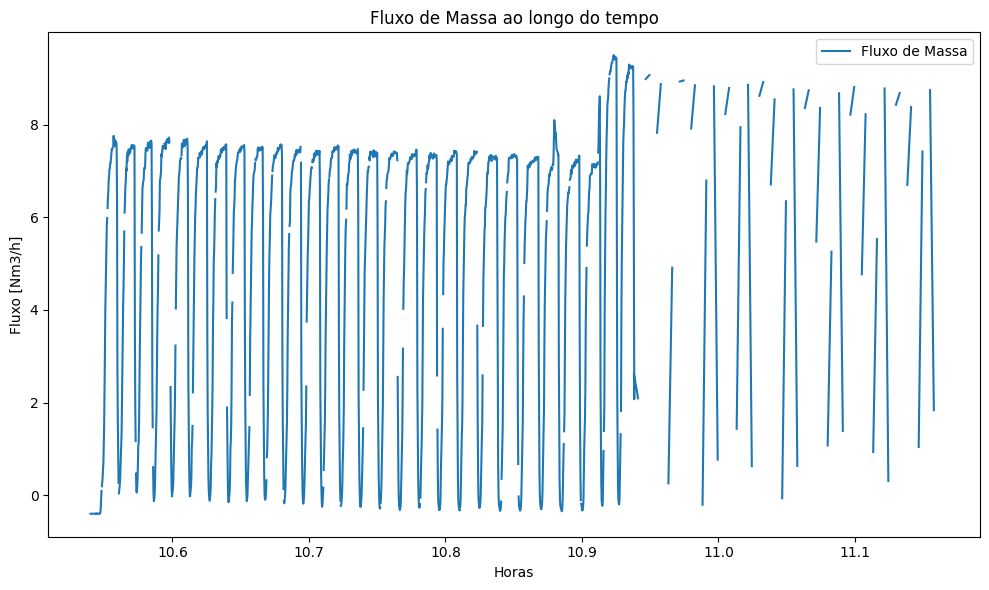

In [7]:
plt.figure(figsize=(10, 6))

# Plotar os dados
plt.plot(dados_07dez['Hora_decimal'], dados_07dez['M_Fluxo_[Nm3/h]'], label='Fluxo de Massa')

# Adicionar rótulos aos eixos
plt.xlabel('Horas')
plt.ylabel('Fluxo [Nm3/h]')
plt.title('Fluxo de Massa ao longo do tempo')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()

# **DELETANDO AS LINHAS A QUAL A COLUNA M_Fluxo_[Nm3/h] SE ENCONTRA VAZIA.**

---



In [8]:
# Excluir as linhas onde 'M_Fluxo_[Nm3/h]' possui dados vazios
dados_07dez = dados_07dez.dropna(subset=['M_Fluxo_[Nm3/h]'])

# Exibir o DataFrame após excluir as linhas
display(dados_07dez)

,Data/Hora,Data,Hora,M_Fluxo_[Nm3/h],V_Fluxo_[Nm3/h],P_Fluxo_[bar],T_Fluxo_[ºC],Pressao_Buffer_[bar],Hora_decimal
37223,2023-12-07 10:32:24.617,07/12/2023,10:32:25,-0.400781,NaN,214.542191,NaN,NaN,10.540000
37224,2023-12-07 10:32:25.617,07/12/2023,10:32:26,-0.398438,NaN,214.540634,NaN,NaN,10.540278
37225,2023-12-07 10:32:26.617,07/12/2023,10:32:27,-0.399609,NaN,NaN,NaN,NaN,10.540556
37226,2023-12-07 10:32:27.617,07/12/2023,10:32:28,-0.398047,NaN,214.542191,NaN,NaN,10.540833
37227,2023-12-07 10:32:28.617,07/12/2023,10:32:29,-0.400000,NaN,214.539062,NaN,NaN,10.541111
...,...,...,...,...,...,...,...,...,...
38875,2023-12-07 11:08:58.063,07/12/2023,11:08:58,7.419141,NaN,218.615631,27.950001,140.0,11.149444
38877,2023-12-07 11:09:08.063,07/12/2023,11:09:08,8.413672,NaN,218.429688,27.971876,NaN,11.152222
38879,2023-12-07 11:09:18.063,07/12/2023,11:09:18,8.744141,NaN,218.284378,27.993750,NaN,11.155000
38880,2023-12-07 11:09:28.063,07/12/2023,11:09:28,1.835547,NaN,217.462509,27.981251,139.0,11.157778


# **PLOTANDO O GRÁFICO ONDE NÃO HÁ MAIS DADOS VAZIOS DE MASSA.**

---



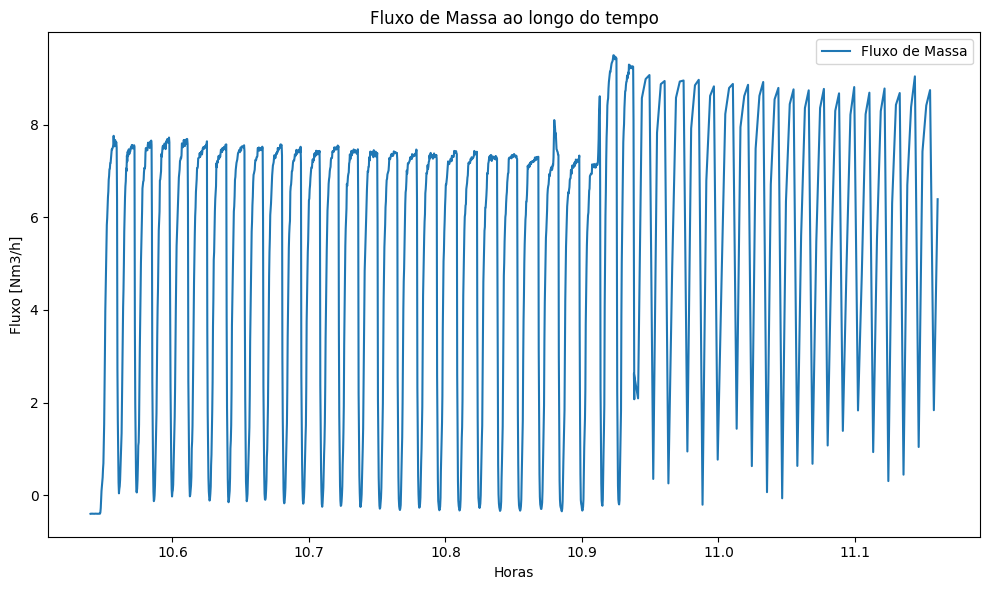

In [9]:
plt.figure(figsize=(10, 6))

# Plotar os dados
plt.plot(dados_07dez['Hora_decimal'], dados_07dez['M_Fluxo_[Nm3/h]'], label='Fluxo de Massa')

# Adicionar rótulos aos eixos
plt.xlabel('Horas')
plt.ylabel('Fluxo [Nm3/h]')
plt.title('Fluxo de Massa ao longo do tempo')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()

# **PREENCHENDO A ÁREA POR DEBAIXO DO GRÁFICO.**

---



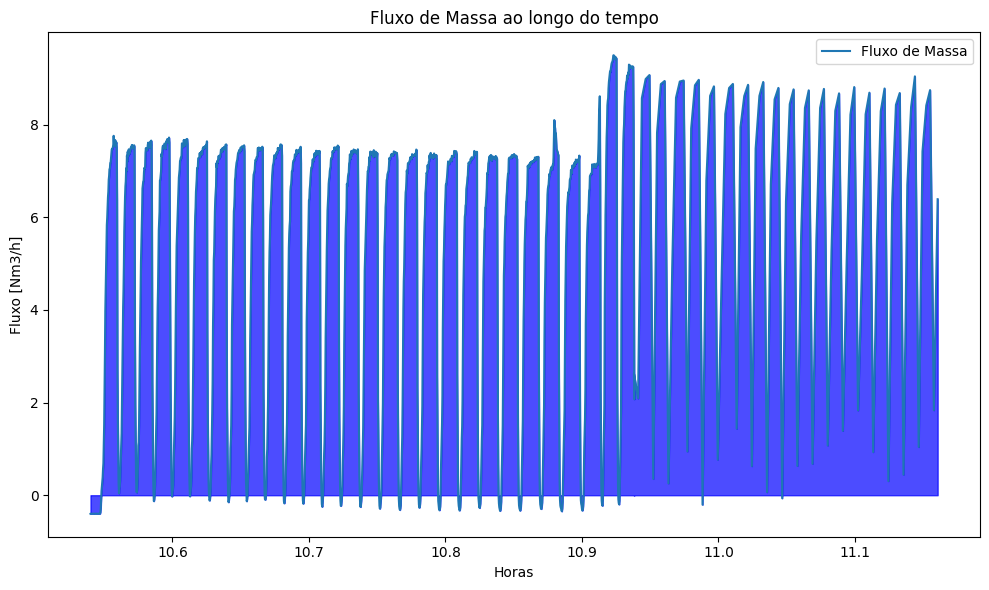

In [10]:
plt.figure(figsize=(10, 6))

# Plotar os dados
plt.plot(dados_07dez['Hora_decimal'], dados_07dez['M_Fluxo_[Nm3/h]'], label='Fluxo de Massa')

# Preencher a área abaixo da curva
plt.fill_between(dados_07dez['Hora_decimal'], dados_07dez['M_Fluxo_[Nm3/h]'], color='blue', alpha=0.7)

# Adicionar rótulos aos eixos
plt.xlabel('Horas')
plt.ylabel('Fluxo [Nm3/h]')
plt.title('Fluxo de Massa ao longo do tempo')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()

# **COMO TEMOS VALORES POR NATUREZA E MÍNIMO DE -0,3993, OS VALORES DE MASSA DO GRÁFICO DEVEM TER INCREMENTO DESSE VALOR.**

---



In [11]:
# Adicionar o valor 0.42422 aos dados da coluna 'M_Fluxo_[Nm3/h]'
dados_07dez['M_Fluxo_[Nm3/h]'] += 0.3993

display(dados_07dez)

,Data/Hora,Data,Hora,M_Fluxo_[Nm3/h],V_Fluxo_[Nm3/h],P_Fluxo_[bar],T_Fluxo_[ºC],Pressao_Buffer_[bar],Hora_decimal
37223,2023-12-07 10:32:24.617,07/12/2023,10:32:25,-0.001481,NaN,214.542191,NaN,NaN,10.540000
37224,2023-12-07 10:32:25.617,07/12/2023,10:32:26,0.000862,NaN,214.540634,NaN,NaN,10.540278
37225,2023-12-07 10:32:26.617,07/12/2023,10:32:27,-0.000309,NaN,NaN,NaN,NaN,10.540556
37226,2023-12-07 10:32:27.617,07/12/2023,10:32:28,0.001253,NaN,214.542191,NaN,NaN,10.540833
37227,2023-12-07 10:32:28.617,07/12/2023,10:32:29,-0.000700,NaN,214.539062,NaN,NaN,10.541111
...,...,...,...,...,...,...,...,...,...
38875,2023-12-07 11:08:58.063,07/12/2023,11:08:58,7.818441,NaN,218.615631,27.950001,140.0,11.149444
38877,2023-12-07 11:09:08.063,07/12/2023,11:09:08,8.812972,NaN,218.429688,27.971876,NaN,11.152222
38879,2023-12-07 11:09:18.063,07/12/2023,11:09:18,9.143441,NaN,218.284378,27.993750,NaN,11.155000
38880,2023-12-07 11:09:28.063,07/12/2023,11:09:28,2.234847,NaN,217.462509,27.981251,139.0,11.157778


# **PLOTANDO O GRÁFICO COM OS DADOS ACRESCENTADOS.**

---



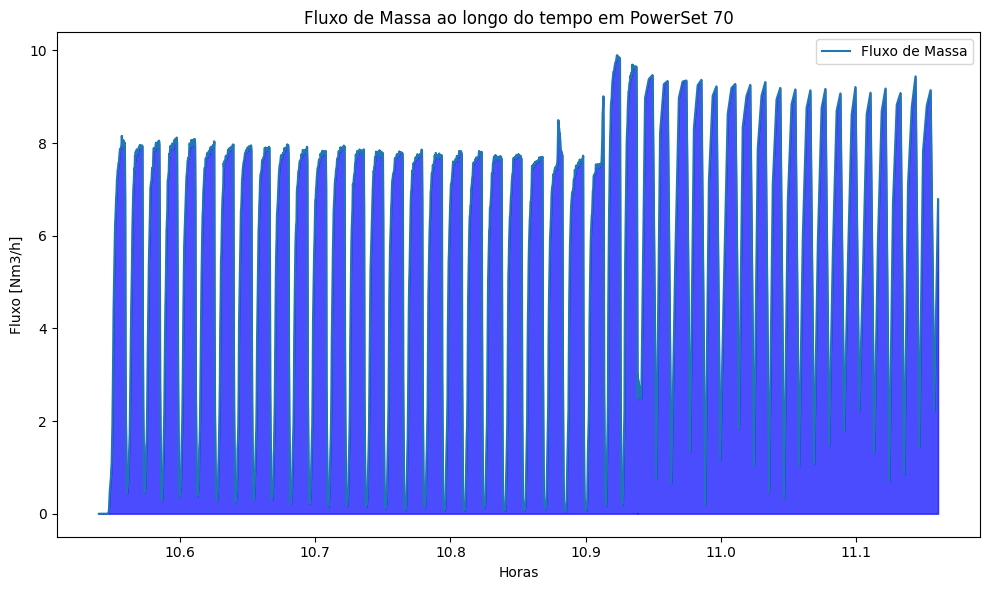

In [12]:
plt.figure(figsize=(10, 6))

# Plotar os dados
plt.plot(dados_07dez['Hora_decimal'], dados_07dez['M_Fluxo_[Nm3/h]'], label='Fluxo de Massa')

# Preencher a área abaixo da curva
plt.fill_between(dados_07dez['Hora_decimal'], dados_07dez['M_Fluxo_[Nm3/h]'], color='blue', alpha=0.7)

# Adicionar rótulos aos eixos
plt.xlabel('Horas')
plt.ylabel('Fluxo [Nm3/h]')
plt.title('Fluxo de Massa ao longo do tempo em PowerSet 70')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()

# **CALCULANDO A INTEGRAL DE Nm3/h EM RELAÇÃO A h, REFERENTE AO GRÁFICO.**

---



In [13]:
# Calcular a integral numérica dos dados de fluxo em relação às horas decimais usando o método do trapézio
integral_numerica = np.trapz(dados_07dez['M_Fluxo_[Nm3/h]'], x=dados_07dez['Hora_decimal'])

print("Quantidade de Fluxo de Massa em Nm3/h: ", integral_numerica)

# Exibir o resultado

qdd_H2 = integral_numerica * 0.0899

print("Quantidade de H2 produzido em kg: ", qdd_H2)

comparacao =  0.25 / qdd_H2

print("Relação de antes e depois H2/H2: ", comparacao)

comparacao = comparacao * 100

comparacao_format = "{:.3f}%".format(comparacao)
print("Relação Percentual de antes e depois H2/H2: ",comparacao_format)

Quantidade de Fluxo de Massa em Nm3/h:  3.6335670797834725
Quantidade de H2 produzido em kg:  0.32665768047253413
Relação de antes e depois H2/H2:  0.7653271756486999
Relação Percentual de antes e depois H2/H2:  76.533%


# **RECAPITULANDO O GRÁFICO DE FLUXO DE MASSA, MAS AGORA ADICIONANDO A PRESSÃO DO BUFFER.**

---




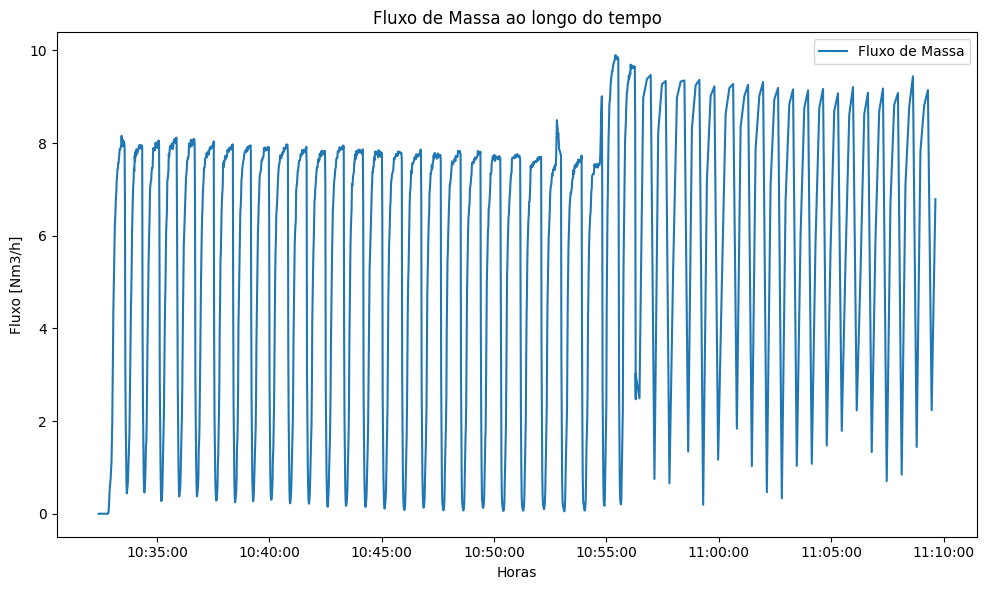

In [32]:
plt.figure(figsize=(10, 6))

# Plotar os dados
plt.plot(dados_07dez['Data/Hora'], dados_07dez['M_Fluxo_[Nm3/h]'], label='Fluxo de Massa')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y \n %H:%M:%S'))

# Adicionar rótulos aos eixos
plt.xlabel('Horas')
plt.ylabel('Fluxo [Nm3/h]')
plt.title('Fluxo de Massa ao longo do tempo')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()

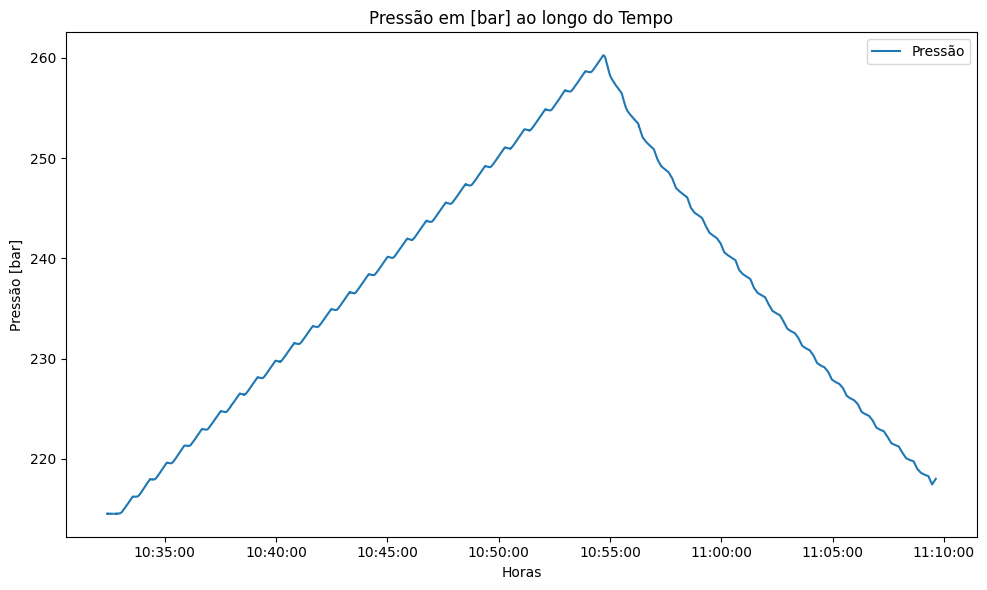

In [31]:
plt.figure(figsize=(10, 6))

# Plotar os dados
plt.plot(dados_07dez['Data/Hora'], dados_07dez['P_Fluxo_[bar]'], label='Pressão')

# TRAZ A DATA EM CIMA DA HORA NO EIXO X
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y \n %H:%M:%S'))

# TRAZ A DATA NO EIXO X
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))

# TRAZ A HORA NO EIXO X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

# Adicionar rótulos aos eixos
plt.xlabel('Horas')
plt.ylabel('Pressão [bar]')
plt.title('Pressão em [bar] ao longo do Tempo')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()

<ipython-input-37-1886af3959d1>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(dados_07dez['Data/Hora'][::100].dt.strftime('%d/%m/%Y \n %H:%M'))


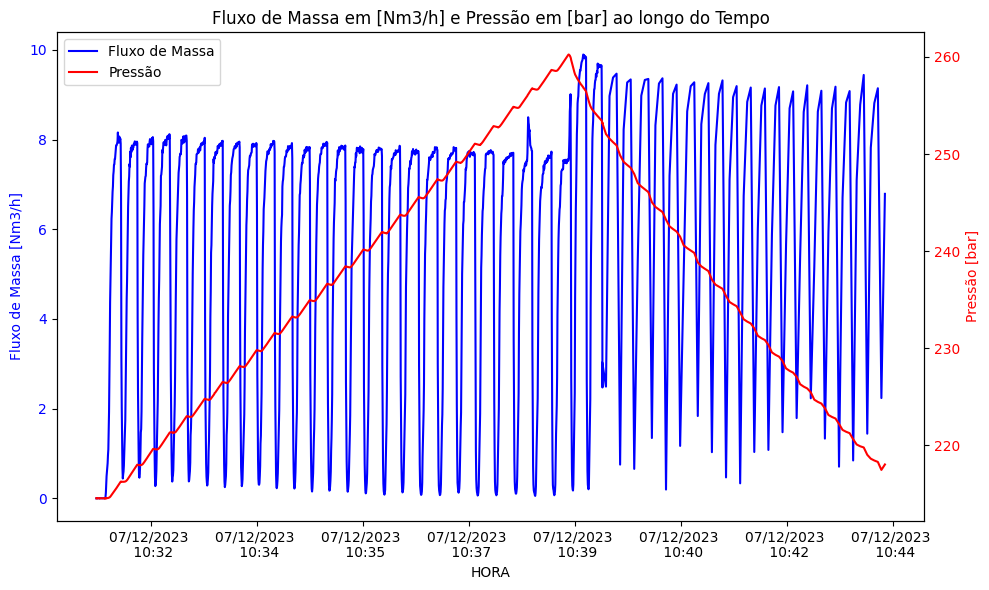

In [37]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotar os dados para o primeiro eixo y (esquerda)
ax1.plot(dados_07dez['Data/Hora'], dados_07dez['M_Fluxo_[Nm3/h]'], label='Fluxo de Massa', color='blue')
ax1.set_xlabel('HORA')
ax1.set_ylabel('Fluxo de Massa [Nm3/h]', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Criar o segundo eixo y (direita)
ax2 = ax1.twinx()
ax2.plot(dados_07dez['Data/Hora'], dados_07dez['P_Fluxo_[bar]'], label='Pressão', color='red')
ax2.set_ylabel('Pressão [bar]', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adicionar legenda
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Fluxo de Massa em [Nm3/h] e Pressão em [bar] ao longo do Tempo')

# Rotacionar os rótulos do eixo x para melhorar a legibilidade
plt.xticks(rotation=45)
ax1.set_xticklabels(dados_07dez['Data/Hora'][::100].dt.strftime('%d/%m/%Y \n %H:%M'))

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [39]:
tipos_dados = dados_07dez.dtypes

print(tipos_dados)

Data/Hora               datetime64[ns]
Data                            object
Hora                            object
M_Fluxo_[Nm3/h]                float64
V_Fluxo_[Nm3/h]                float64
P_Fluxo_[bar]                  float64
T_Fluxo_[ºC]                   float64
Pressao_Buffer_[bar]           float64
Hora_decimal                   float64
dtype: object


In [40]:
SUM_P_buffer = dados_07dez['Pressao_Buffer_[bar]'].sum()

print(SUM_P_buffer)

18499.0


In [41]:
display(dados_07dez)

,Data/Hora,Data,Hora,M_Fluxo_[Nm3/h],V_Fluxo_[Nm3/h],P_Fluxo_[bar],T_Fluxo_[ºC],Pressao_Buffer_[bar],Hora_decimal
37223,2023-12-07 10:32:24.617,07/12/2023,10:32:25,-0.001481,NaN,214.542191,NaN,NaN,10.540000
37224,2023-12-07 10:32:25.617,07/12/2023,10:32:26,0.000862,NaN,214.540634,NaN,NaN,10.540278
37225,2023-12-07 10:32:26.617,07/12/2023,10:32:27,-0.000309,NaN,NaN,NaN,NaN,10.540556
37226,2023-12-07 10:32:27.617,07/12/2023,10:32:28,0.001253,NaN,214.542191,NaN,NaN,10.540833
37227,2023-12-07 10:32:28.617,07/12/2023,10:32:29,-0.000700,NaN,214.539062,NaN,NaN,10.541111
...,...,...,...,...,...,...,...,...,...
38875,2023-12-07 11:08:58.063,07/12/2023,11:08:58,7.818441,NaN,218.615631,27.950001,140.0,11.149444
38877,2023-12-07 11:09:08.063,07/12/2023,11:09:08,8.812972,NaN,218.429688,27.971876,NaN,11.152222
38879,2023-12-07 11:09:18.063,07/12/2023,11:09:18,9.143441,NaN,218.284378,27.993750,NaN,11.155000
38880,2023-12-07 11:09:28.063,07/12/2023,11:09:28,2.234847,NaN,217.462509,27.981251,139.0,11.157778
